<a href="https://colab.research.google.com/github/mpartain1/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv('/content/sales_predictions.csv')

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.shape
#1) 8523 rows, 12 columns

(8523, 12)

In [40]:
df.info()
#2) See below for data types of each variable under Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
#3) No duplicates, but wanted to show the code nonetheless
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [42]:
#4) 1463 missing values for Item_Weight, 2410 missing values for Outlet_Size
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
#5)
grouped = df.groupby('Item_Type')
grouped_means = grouped['Item_Weight'].mean()
print(grouped_means)
#Notice that all the group means hover around 12
mean_weight = df['Item_Weight'].mean()
print(mean_weight)
df['Item_Weight'].fillna(mean_weight, inplace = True)
#For Item_Weight, I addressed the missing values by taking the mean
#weight of every item since this method was simple and made sense.

df['Item_Outlet_Sales'].describe().round(2)
for i in range (df.shape[0]):
  if (df['Item_Outlet_Sales'][i] > 3101):
    df['Outlet_Size'].fillna('High', inplace = True)
  elif ((df['Item_Outlet_Sales'][i] > 834) & (df['Item_Outlet_Sales'][i] < 3101)):
    df['Outlet_Size'].fillna('Medium', inplace = True)
  else:
    df['Outlet_Size'].fillna('Small', inplace = True)
#For Outlet_Size, I filled in missing values according to the
#pattern of Item_Outlet_Sales since I would imagine there is a 
#positive correlation between the two.




Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64
12.857645184136183


In [44]:
#6)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
#7)
df['Item_Fat_Content'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
#8) 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


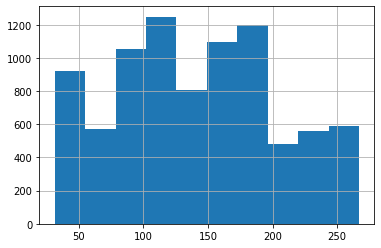

In [47]:
df['Item_MRP'].hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f3dfefbbc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3dfefc54d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3dfefca890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3dfefca350>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3dfefbbd90>,
  <matplotlib.lines.Line2D at 0x7f3dfef63e50>]}

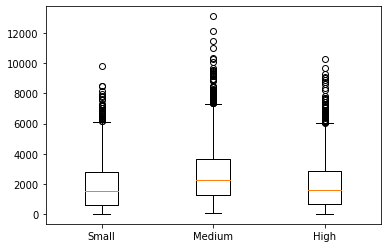

In [56]:
Small = df.loc[df['Outlet_Size']=='Small',:]
Medium = df.loc[df['Outlet_Size']=='Medium',:]
Large = df.loc[df['Outlet_Size']=='High',:]
plt.boxplot([Small['Item_Outlet_Sales'],Medium['Item_Outlet_Sales'],Large['Item_Outlet_Sales']], labels = ['Small', 'Medium', 'High'])
#From these plots we can tell that largest volume of sales was surprisingly not from the large outlet stores, but from the medium ones.

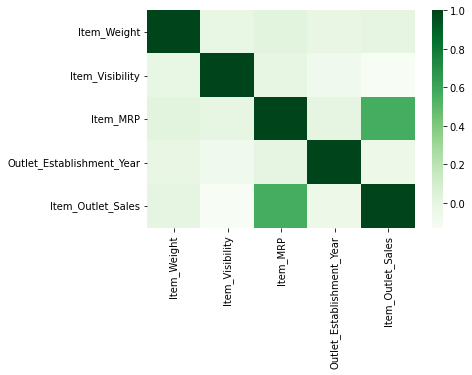

In [57]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')
#From this we can conclude that Item_Weight and Item_Outlet_Sales are most correlated, which basically means higher weight generally means a higher selling item.